# Training a CNN for a real-world Image Classification Task
### Dataset: https://www.kaggle.com/datasets/mostafaabla/garbage-classification

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

Load the data into three sets:

In [4]:
# Setting Path
data_folder = pathlib.Path('./data/garbage_classification')

In [5]:
# Loading dataset
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32,
    label_mode='categorical')

Found 1550 files belonging to 2 classes.
Found 150 files belonging to 2 classes.
Found 110 files belonging to 2 classes.


### Definning the model

In [6]:
# Setting the model
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)  
model = keras.Model(inputs=inputs, outputs=outputs)

**Shape, Type**

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Trainning the model
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


49/49 [==============================] - 28s 543ms/step - loss: 0.5682 - accuracy: 0.7077 - val_loss: 0.3169 - val_accuracy: 0.9133
Epoch 2/30
49/49 [==============================] - 27s 543ms/step - loss: 0.3383 - accuracy: 0.8684 - val_loss: 0.3806 - val_accuracy: 0.8333
Epoch 3/30
49/49 [==============================] - 26s 517ms/step - loss: 0.2784 - accuracy: 0.8903 - val_loss: 0.2090 - val_accuracy: 0.9200
Epoch 4/30
49/49 [==============================] - 25s 513ms/step - loss: 0.2259 - accuracy: 0.9116 - val_loss: 0.2710 - val_accuracy: 0.8800
Epoch 5/30
49/49 [==============================] - 25s 512ms/step - loss: 0.2287 - accuracy: 0.9110 - val_loss: 0.5013 - val_accuracy: 0.7467
Epoch 6/30
49/49 [==============================] - 25s 511ms/step - loss: 0.1848 - accuracy: 0.9226 - val_loss: 0.3168 - val_accuracy: 0.8733
Epoch 7/30
49/49 [==============================] - 26s 534ms/step - loss: 0.1815 - accuracy: 0.9303 - val_loss: 0.6923 - val_accuracy: 0.6533
Epoch 8/30

**Displaying curves of loss and accuracy during training**

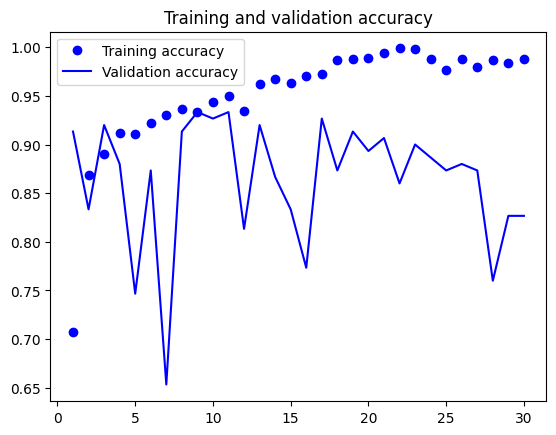

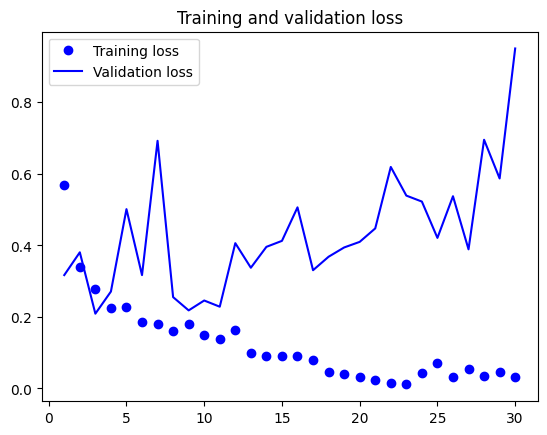

In [10]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [11]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 1s 113ms/step - loss: 0.2731 - accuracy: 0.9273
Test accuracy: 0.927


### Using data augmentation

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

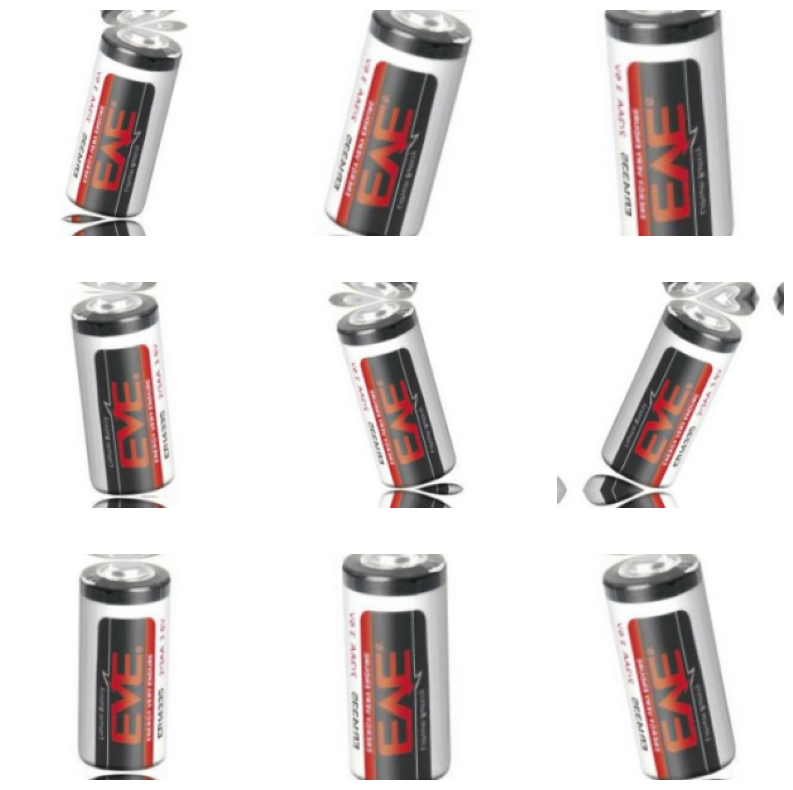

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Shape, Type**

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

**Training the regularized convnet**

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
49/49 [==============================] - 30s 576ms/step - loss: 0.7591 - accuracy: 0.5819 - val_loss: 0.6411 - val_accuracy: 0.8133
Epoch 2/100
49/49 [==============================] - 30s 607ms/step - loss: 0.5758 - accuracy: 0.7419 - val_loss: 0.5542 - val_accuracy: 0.8000
Epoch 3/100
49/49 [==============================] - 32s 651ms/step - loss: 0.4220 - accuracy: 0.8226 - val_loss: 0.5194 - val_accuracy: 0.7200
Epoch 4/100
49/49 [==============================] - 32s 656ms/step - loss: 0.3741 - accuracy: 0.8465 - val_loss: 0.4975 - val_accuracy: 0.7200
Epoch 5/100
49/49 [==============================] - 28s 571ms/step - loss: 0.3448 - accuracy: 0.8581 - val_loss: 0.5796 - val_accuracy: 0.6467
Epoch 6/100
49/49 [==============================] - 28s 573ms/step - loss: 0.3029 - accuracy: 0.8697 - val_loss: 0.5082 - val_accuracy: 0.7133
Epoch 7/100
49/49 [==============================] - 27s 551ms/step - loss: 0.2848 - accuracy: 0.8839 - val_loss: 0.8627 - val_accuracy:

**Evaluating the model on the test set**

In [20]:
test_model = keras.models.load_model(
    "./models/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 1s 102ms/step - loss: 0.4717 - accuracy: 0.9273
Test accuracy: 0.927


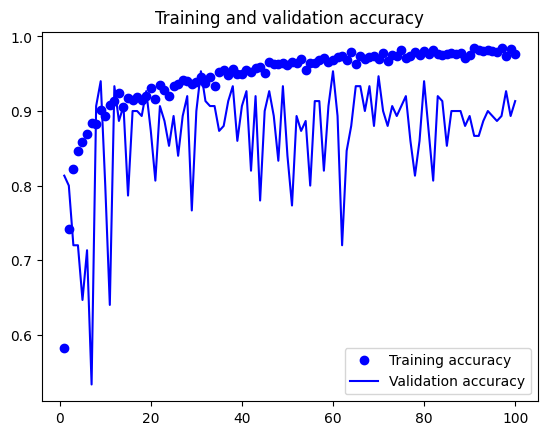

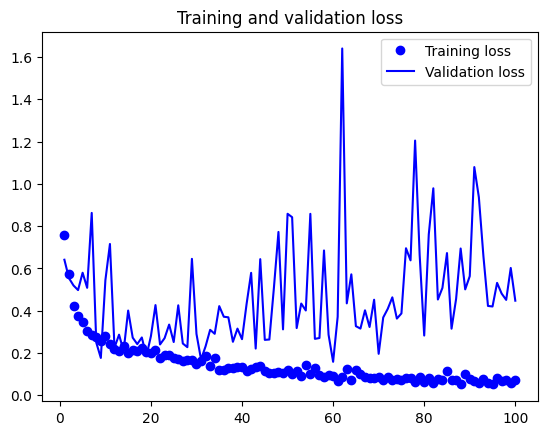

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Getting the prediction result from the model**

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

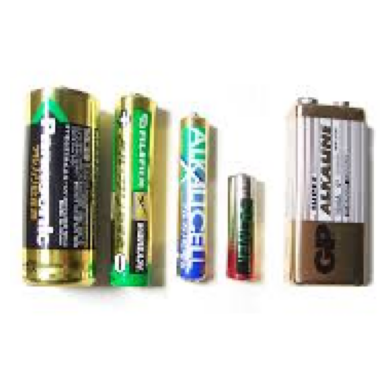

In [31]:
test_path = './data/'
img_test1 = image.load_img(test_path + '1.jpg', target_size=(180, 180))
img_test1_array = image.img_to_array(img_test1)
img_test1_array = np.expand_dims(img_test1_array, axis=0)

plt.imshow(img_test1)
plt.axis('off')
plt.show()

In [34]:
predictions = model.predict(img_test1_array)
predicted_class = np.argmax(predictions[0])

class_names = ['battery', 'plastic']
predicted_class_name = class_names[predicted_class]
print(f'The predicted class is: {predicted_class_name}')

1/1 [==============================] - 0s 25ms/step
The predicted class is: battery


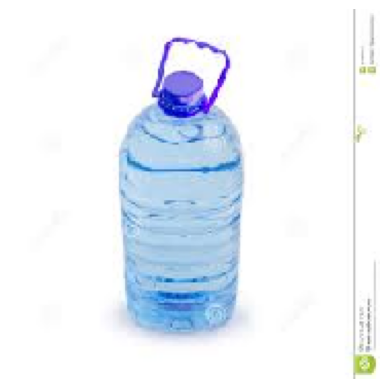

In [33]:
img_test2 = image.load_img(test_path + '2.jpg', target_size=(180, 180))
img_test2_array = image.img_to_array(img_test2)
img_test2_array = np.expand_dims(img_test2_array, axis=0)

plt.imshow(img_test2)
plt.axis('off')
plt.show()

In [35]:
predictions = model.predict(img_test2_array)
predicted_class = np.argmax(predictions[0])

class_names = ['battery', 'plastic']
predicted_class_name = class_names[predicted_class]
print(f'The predicted class is: {predicted_class_name}')

1/1 [==============================] - 0s 26ms/step
The predicted class is: plastic
